Select kernel (kernels allow you to run code in "sessions").

Identify Python version in case you need to troubleshoot later.

In [1]:
import sys
print(sys.executable)

C:\Users\imenb\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe


use %pip to install each library (NOTE: you may need !pip if you are using a Mac, !pip or %pip is only for jupyter notebooks; if you type it in the console for a normal python file, use pip)

In [2]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install seaborn plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


After installing these individually, restart the kernel, then run the following to import:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv(r"C:\Users\imenb\OneDrive\Desktop\python_ai_demo\DailyDelhiClimateTrain.csv")
print(data.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


Let’s have a look at the descriptive statistics of this data before moving forward.

In [6]:
print(data.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


What are the columns?

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


Update nbformat package in order to needed to create graphs.

In [8]:
%pip install --upgrade nbformat


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Restart kernel.

Create a figure showing the Mean Temp in Delhi from Jan 2013-Jan 2017.

In [9]:
figure = px.line(data, x="date",
                 y = "meantemp",
                 title = 'Mean Temp in Delhi from Jan 2013-Jan 2017')
figure.show()

Create a figure showing the Humdity in Delhi from Jan 2013-Jan 2017.

In [10]:
figure = px.line(data, x="date", 
                 y="humidity", 
                 title='Humdity in Delhi from Jan 2013-Jan 2017')
figure.show()

Create a figure for wind speed.

In [11]:
figure = px.line(data, x="date", 
                 y="wind_speed", 
                 title='Wind Speed in Delhi Over the Years')
figure.show()

Till 2015, the wind speed was higher during monsoons (August & September) and retreating monsoons (December & January). After 2015, there were no anomalies in wind speed during monsoons. Now let’s have a look at the relationship between temperature and humidity.

In [12]:
%pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.6 kB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 60.6/60.6 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.6/9.8 MB 18.5 MB/s eta 0:00:01
   ------------ --------------------------- 3.1/9.8 MB 39.6 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.8 MB 40.3 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 48.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 48.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   --------------------------------------- 233.9/233.9 kB 14.0 MB/s eta 0:00:00
   ----------

In [13]:
import statsmodels.api as sm
print("statsmodels is installed successfully.")


statsmodels is installed successfully.


In [14]:
figure = px.scatter(data_frame = data, x="humidity",
                    y="meantemp", size="meantemp", 
                    trendline="ols", 
                    title = "Relationship Between Temperature and Humidity")
figure.show()

This line of best fit shows a negative correlation between temperature and humidity, which we now know because we're superstar data scientists!

Let's now analyze the temperature change.

In [15]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


View a plot of the temperature change across several years.

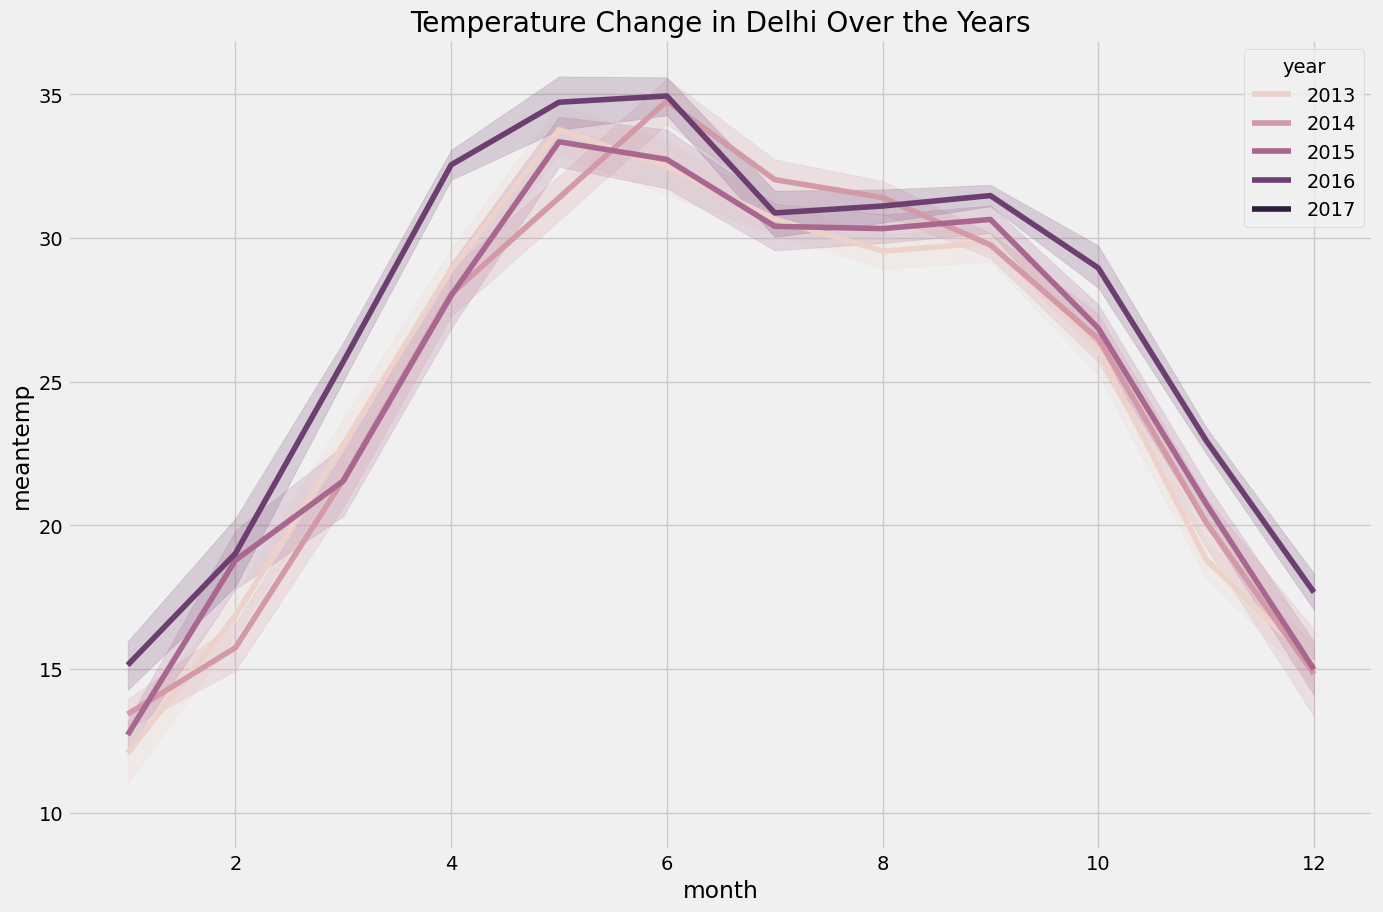

In [16]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

Now, let's use AI to forecast the weather.

In [17]:
%pip install prophet

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/13.3 MB 22.0 MB/s eta 0:00:01
   ---- ----------------------------------- 1.5/13.3 MB 15.6 MB/s eta 0:00:01
   -------- ------------------------------- 2.9/13.3 MB 20.6 MB/s eta 0:00:01
   ----------------- ---------------------- 5.9/13.3 MB 31.3 MB/s eta 0:00:01
   ----------------------- ---------------- 7.8/13.3 MB 33.4 MB/s eta 0:00:01
   --------------------------- ------------ 9.3/13.3 MB 33.2 MB/s eta 0:00:01
   ----------------------------------- ---- 11.7/13.3 MB 43.7 MB/s eta 0:00:01
   ---------------------------------------  13.3/13.3 MB 46.9 MB/s eta 0:00:01
   ---------------------------------------  13.3/13.3 MB 46.9 MB/s eta 0:0

Convert the time data to "ds" and labels as "y"

In [18]:
forecast_data = data.rename(columns = {"date": "ds", 
                                       "meantemp": "y"})
print(forecast_data)

             ds          y    humidity  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1
...         ...        ...         ...         ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1

[1462 rows x 7 columns]


In [19]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

C:\Users\imenb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

07:37:23 - cmdstanpy - INFO - Chain [1] start processing
07:37:24 - cmdstanpy - INFO - Chain [1] done processing
